<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/%5BReview%5DKeras3_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #데이터 분할시킬 때 사용하는 함수

In [2]:
#하이퍼파라미터(상수값으로)
MY_EPOCH = 50
MY_BATCH = 32
boston = load_boston()
title = boston['feature_names']
X = boston['data']
y = boston['target']

#title에 'MEDV(타겟)'추가
title = np.append(title, ['MEDV'])

#DATA와 Target 합치기
raw_data = np.append(X, y.reshape(-1, 1), axis = 1) #axis = 1안붙이면 카티젼조인이 된다. n*n개 생김.
len(raw_data)

506

In [3]:

#df = DataFrame으로 수정
df = pd.DataFrame(raw_data, columns = title)

#통계
df.describe()

#'crim'항목 누락
df = df.drop('CRIM', axis=1) #df.drop(columns='CRIM'),  df.pop(0) 해도 괜찮아
title=title[1:] #타이틀도 날려줘야지! 나중에 또 쓸지모르니까


In [4]:

#스케일링  : 너무 크거나 너무 작은 데이터가 나오지 않도록.-1~1사이의 값으로 압축시켜버림.
scaler = StandardScaler()
scaled_DB = scaler.fit_transform(df)

scaled_DB = pd.DataFrame(scaled_DB, columns=title)
scaled_DB

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


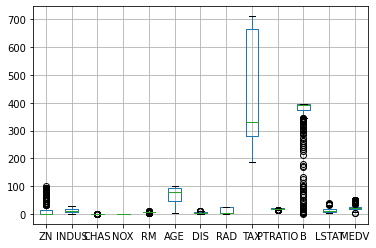

In [5]:
bp = df.boxplot()

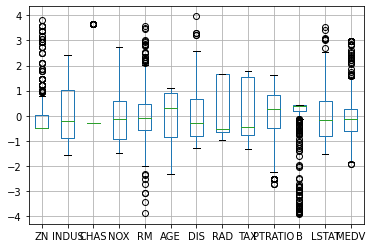

In [6]:
bp2 = scaled_DB.boxplot()
#보면 이상치가 많은 Zn, RM, B는 누락시켜도 된다. MEDV는 결과값이니까 안없애도 괜찮아.

In [7]:
#X, y로 분리
X = scaled_DB.drop('MEDV', axis=1)
y = scaled_DB['MEDV']
print(scaled_DB.shape)
print(X.shape)
print(y.shape)

(506, 13)
(506, 12)
(506,)


In [8]:
#데이터 분할하기 (train, test 데이터를 분할 - 분할방식:랜덤하게 or 위에서부터 순차적으로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) #여기서 5는 random seed값이다
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 12)
(152, 12)
(354,)
(152,)


In [9]:
# 뉴런 생성하여 학습시키기
#1) 모델 생성하기
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=12))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=900, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              201000    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               300300    
_________________________________________________________________
dense_3 (Dense)              (None, 900)               270900    
_________________________________________________________________
dense_4 (Dense)              (None, 500)               450500    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 501       
Total params: 1,225,801
Trainable params: 1,225,801
Non-trainable params: 0
______________________________________________

In [10]:
#컴파일: 손실함수, 최적화함수 어떤 것을 쓸 것인가?
model.compile(optimizer = 'sgd', loss='mse', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs = MY_EPOCH, batch_size=MY_BATCH, verbose=1)
#accuracy 말고 loss가 0.01이하로 나오면 된다. 즉 10%오차 이하로 나오면 된다.
#분류하는 작업은 accuracy가 중요한데, 값을 추정하는 것은 loss가 중요하다.

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.8222 - accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 0s 15ms/step - loss: 0.7295 - accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 0s 15ms/step - loss: 0.5629 - accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 0.4650 - accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 0s 21ms/step - loss: 0.3501 - accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 0s 21ms/step - loss: 0.3187 - accuracy: 0.0000e+00
Epoch 7/50
12/12 [==============================] - 0s 21ms/step - loss: 0.2288 - accuracy: 0.0000e+00
Epoch 8/50
12/12 [==============================] - 0s 24ms/step - loss: 0.2732 - accuracy: 0.0000e+00
Epoch 9/50
12/12 [==============================] - 0s 22ms/step - loss: 0.4526 - accuracy: 0.0000e+00
Epoch 10/50
12/12 [==============================] - 0s 23ms/step - loss:

In [12]:
#평가 evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=1)
loss,_ =model.evaluate(X_test, y_test, verbose=1) #두번째 acc는 받지 않을경우
print(loss)
print(acc)

5/5 [==============================] - 0s 7ms/step - loss: 0.1739 - accuracy: 0.0000e+00
0.17385612428188324
0.0


In [15]:
#예측 predict: 예측하는 것이라 y값을 주면 오류
pred = model.predict(X_test) #모델에 완전히 새로운 데이터를 주어서 CNN을 이용해 얻어진 모델을 통해 답을 유추
print(pred.shape)


(152, 1)


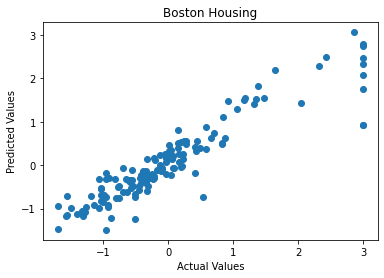

In [22]:
#그래프 작성해보기
plt.scatter(y_test, pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Boston Housing')
plt.show()